<a href="https://colab.research.google.com/github/pascalghanimi/Injury-Prediction-in-Runners/blob/main/Ensemble_XGBoost_LightGBM_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install packages
!pip uninstall -y numpy
!pip install numpy==1.26.4 --force-reinstall
!pip install catboost --force-reinstall --no-deps
!pip install optuna

# Restart runtime
import os
os._exit(00)


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 24.9 MB/s eta 0:00:00


In [ ]:
# Data extraction
import pickle

with open("features.pkl", "rb") as f:
  features = pickle.load(f)

with open("features_days.pkl", "rb") as f:
  features_days = pickle.load(f)

with open("features_weeks.pkl", "rb") as f:
  features_weeks = pickle.load(f)

with open("features_objective.pkl", "rb") as f:
  features_objective = pickle.load(f)

with open("features_subjective.pkl", "rb") as f:
  features_subjective = pickle.load(f)

with open("labels.pkl", "rb") as f:
  labels = pickle.load(f)

print(features[0][0]) # first athlete first row
print(features_days[0][0])
print(features_weeks[0])
print(labels[0])

print(len(features[0][0])) # amount of features

[ 0.77523982  0.48379555 -0.34174298  1.12482238  4.65573275 -0.30257114
 -0.36195376  1.13221076  0.88408664  0.98946749 -1.07576228 -0.58780279
 -0.34515758 -0.21498604 -0.25818757 -0.30257114 -0.36653747 -1.10832632
 -1.12373205 -1.11938273  0.76147321 -0.58880824 -0.33963599 -0.22015974
 -0.26519341  3.1128211  -0.36131219  0.94306135  0.88408664  0.88198911
 -1.08073515 -0.58890474 -0.33382237 -0.21223522 -0.26471133 -0.29617444
 -0.36131219 -1.10795815 -1.12373205 -1.11942205  0.7667035  -0.5913292
 -0.33382237 -0.22367068 -0.26509659 -0.29617444  2.42402301  0.57403001
  0.88989186  0.9965464   0.78053094  2.39956507  5.70866175 -0.21223522
 -0.26519341  3.3763886  -0.35067995  1.13636789  0.88989186  0.88771258
  0.78584128 -0.58219763 -0.3393889  -0.21762941 -0.25818757 -0.28968273
  2.19131074  0.96442407  0.89572629  0.67074481  0.37283858 -0.47040001
 -0.01179093  0.73505066  1.36358038  0.5749299   0.54093582  1.26319022
  2.68987335 -0.05530893  0.11981333  1.16084473  1.

In [ ]:
import numpy as np

X = np.vstack([features[athlete_id] for athlete_id in features])
X_days = np.vstack([features_days[athlete_id] for athlete_id in features_days])
X_weeks = np.vstack([features_weeks[athlete_id] for athlete_id in features_weeks])
X_objective = np.vstack([features_objective[athlete_id] for athlete_id in features_objective])
X_subjective = np.vstack([features_subjective[athlete_id] for athlete_id in features_subjective])

Y = np.hstack([labels[athlete_id] for athlete_id in labels])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_days, X_temp_days, Y_train_days, Y_temp_days = train_test_split(X_days, Y, test_size=0.3, random_state=42)
X_val_days, X_test_days, Y_val_days, Y_test_days = train_test_split(X_temp_days, Y_temp_days, test_size=0.5, random_state=42)

X_train_weeks, X_temp_weeks, Y_train_weeks, Y_temp_weeks = train_test_split(X_weeks, Y, test_size=0.3, random_state=42)
X_val_weeks, X_test_weeks, Y_val_weeks, Y_test_weeks = train_test_split(X_temp_weeks, Y_temp_weeks, test_size=0.5, random_state=42)

X_train_subjective, X_temp_subjective, Y_train_subjective, Y_temp_subjective = train_test_split(X_subjective, Y, test_size=0.3, random_state=42)
X_val_subjective, X_test_subjective, Y_val_subjective, Y_test_subjective = train_test_split(X_temp_subjective, Y_temp_subjective, test_size=0.5, random_state=42)

X_train_objective, X_temp_objective, Y_train_objective, Y_temp_objective = train_test_split(X_objective, Y, test_size=0.3, random_state=42)
X_val_objective, X_test_objective, Y_val_objective, Y_test_objective = train_test_split(X_temp_objective, Y_temp_objective, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_days.shape, X_val_days.shape, X_test_days.shape)
print(X_train_weeks.shape, X_val_weeks.shape, X_test_weeks.shape)
print(X_train_subjective.shape, X_val_subjective.shape, X_test_subjective.shape)
print(X_train_objective.shape, X_val_objective.shape, X_test_objective.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(29876, 139) (6402, 139) (6402, 139)
(29876, 70) (6402, 70) (6402, 70)
(29876, 69) (6402, 69) (6402, 69)
(29876, 48) (6402, 48) (6402, 48)
(29876, 91) (6402, 91) (6402, 91)
(29876,) (6402,) (6402,)


In [ ]:
import joblib

# Base
xgb_models = joblib.load("xgb_models.pkl")
lgbm_models = joblib.load("lgbm_models.pkl")
cb_models = joblib.load("cb_models.pkl")
all_models = xgb_models + lgbm_models + cb_models

# Days
xgb_models_days = joblib.load("xgb_models_days.pkl")
lgbm_models_days = joblib.load("lgbm_models_days.pkl")
cb_models_days = joblib.load("cb_models_days.pkl")
all_models_days = xgb_models_days + lgbm_models_days + cb_models_days

# Weeks
xgb_models_weeks = joblib.load("xgb_models_weeks.pkl")
lgbm_models_weeks = joblib.load("lgbm_models_weeks.pkl")
cb_models_weeks = joblib.load("cb_models_weeks.pkl")
all_models_weeks = xgb_models_weeks + lgbm_models_weeks + cb_models_weeks

# Objective
xgb_models_objective = joblib.load("xgb_models_objective.pkl")
lgbm_models_objective = joblib.load("lgbm_models_objective.pkl")
cb_models_objective = joblib.load("cb_models_objective.pkl")
all_models_objective = xgb_models_objective + lgbm_models_objective + cb_models_objective

# Subjective
xgb_models_subjective = joblib.load("xgb_models_subjective.pkl")
lgbm_models_subjective = joblib.load("lgbm_models_subjective.pkl")
cb_models_subjective = joblib.load("cb_models_subjective.pkl")
all_models_subjective = xgb_models_subjective + lgbm_models_subjective + cb_models_subjective

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:04] WARNING: /workspace/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:04] WARNING: /workspace/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:04] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserW

In [ ]:
print(all_models[0][0]) # return first Model of all models
# print(all_models) # this line would print all models

CalibratedClassifierCV(cv='prefit',
                       estimator=XGBClassifier(base_score=None, booster='dart',
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.9624636127778242,
                                               device=None,
                                               early_stopping_rounds=30,
                                               enable_categorical=False,
                                               eval_metric='auc',
                                               feature_types=None,
                                               gamma=1.0464986086983894,
                                               grow_policy='depthwise',
                                               importance_type=None,
                                           

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def flatten_models(nested_models):
    flat_models = []
    for item in nested_models:
        if isinstance(item, list):
            flat_models.extend(flatten_models(item))
        else:
            flat_models.append(item)
    return flat_models

def ensemble_pred(models, X):
    flat_models = flatten_models(models)
    valid_models = [m for m in flat_models if hasattr(m, 'predict_proba')]

    if not valid_models:
        raise ValueError("Nop valid model found")

    probas = np.stack([m.predict_proba(X)[:,1] for m in valid_models])
    return np.mean(probas, axis=0)

def compute_metrics(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    j_scores = 1.3 * tpr - fpr
    best_idx = np.argmax(j_scores)

    y_pred = (y_pred_proba >= thresholds[best_idx]).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        'auc': roc_auc_score(y_true, y_pred_proba),
        'sensitivity': tp / (tp + fn),
        'specificity': tn / (tn + fp),
        'precision': tp / (tp + fp),
        'f1': 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn))),
        'threshold': thresholds[best_idx]
    }

def load_models(*paths):
    models = []
    for path in paths:
        try:
            models.extend(flatten_models(joblib.load(path)))
        except:
            print(f"Error during loading {path}")
    return models

# Define feature sets
feature_sets = {
    'All Features': (
        load_models("xgb_models.pkl", "lgbm_models.pkl", "cb_models.pkl"),
        X_test, Y_test
    ),
    'Days': (
        load_models("xgb_models_days.pkl", "lgbm_models_days.pkl", "cb_models_days.pkl"),
        X_test_days, Y_test_days
    ),
    'Weeks': (
        load_models("xgb_models_weeks.pkl", "lgbm_models_weeks.pkl", "cb_models_weeks.pkl"),
        X_test_weeks, Y_test_weeks
    ),
    'Objective': (
        load_models("xgb_models_objective.pkl", "lgbm_models_objective.pkl", "cb_models_objective.pkl"),
        X_test_objective, Y_test_objective
    ),
    'Subjective': (
        load_models("xgb_models_subjective.pkl", "lgbm_models_subjective.pkl", "cb_models_subjective.pkl"),
        X_test_subjective, Y_test_subjective
    )
}

# Calculate metrics and visualize
results = {}
print("\n📊 Ensemble Evaluation Results\n" + "-" * 40)

for name, (models, X, y) in feature_sets.items():
    try:
        y_pred = ensemble_pred(models, X)
        metrics = compute_metrics(y, y_pred)
        results[name] = metrics

        print(f"\n🔹 {name}")
        print(f"AUC:         {metrics['auc']:.4f}")
        print(f"Sensitivity: {metrics['sensitivity']:.4f}")
        print(f"Specificity: {metrics['specificity']:.4f}")
        print(f"Precision:   {metrics['precision']:.4f}")
        print(f"F1-Score:    {metrics['f1']:.4f}")
        print(f"Threshold:   {metrics['threshold']:.4f}")

    except Exception as e:
        print(f"\n❌ {name} failed: {str(e)}")
        results[name] = None


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:54] WARNING: /workspace/src/gbm/gbtree.cc:363: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:54] WARNING: /workspace/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:54] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserW


📊 Ensemble Evaluation Results
----------------------------------------

🔹 All Features
AUC:         0.7299
Sensitivity: 0.8077
Specificity: 0.5340
Precision:   0.0278
F1-Score:    0.0538
Threshold:   0.0100

🔹 Days
AUC:         0.7050
Sensitivity: 0.8942
Specificity: 0.4336
Precision:   0.0254
F1-Score:    0.0494
Threshold:   0.0096

🔹 Weeks
AUC:         0.7029
Sensitivity: 0.8365
Specificity: 0.4411
Precision:   0.0241
F1-Score:    0.0469
Threshold:   0.0098

🔹 Objective
AUC:         0.7098
Sensitivity: 0.8269
Specificity: 0.4876
Precision:   0.0260
F1-Score:    0.0503
Threshold:   0.0100

🔹 Subjective
AUC:         0.6577
Sensitivity: 0.8269
Specificity: 0.3946
Precision:   0.0221
F1-Score:    0.0430
Threshold:   0.0112


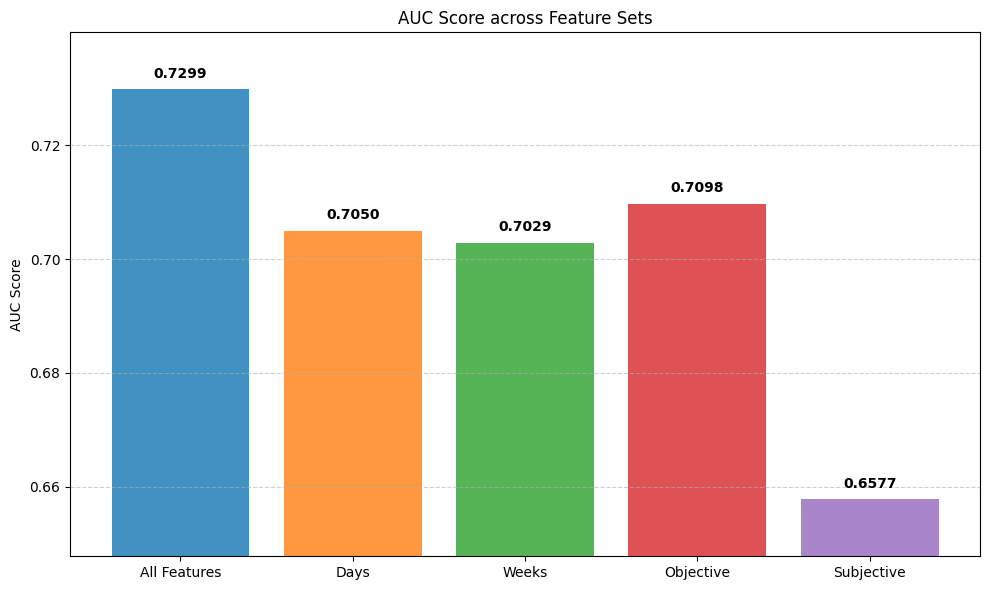

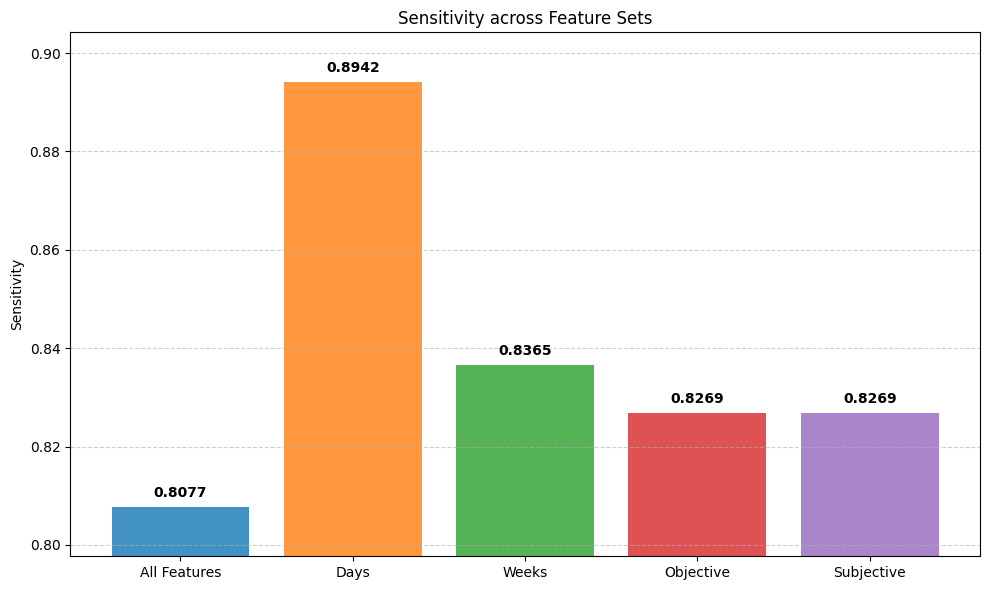

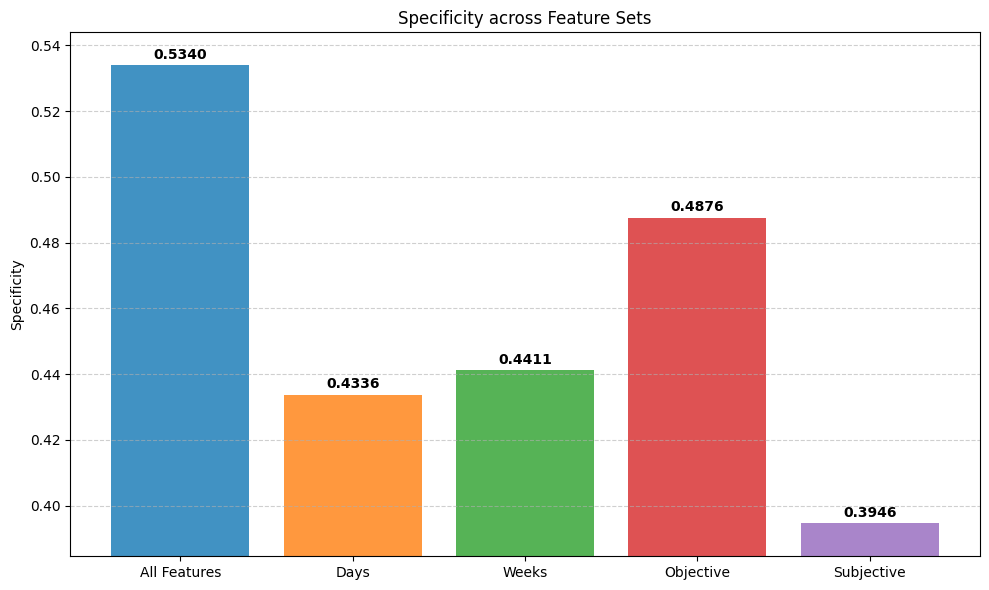

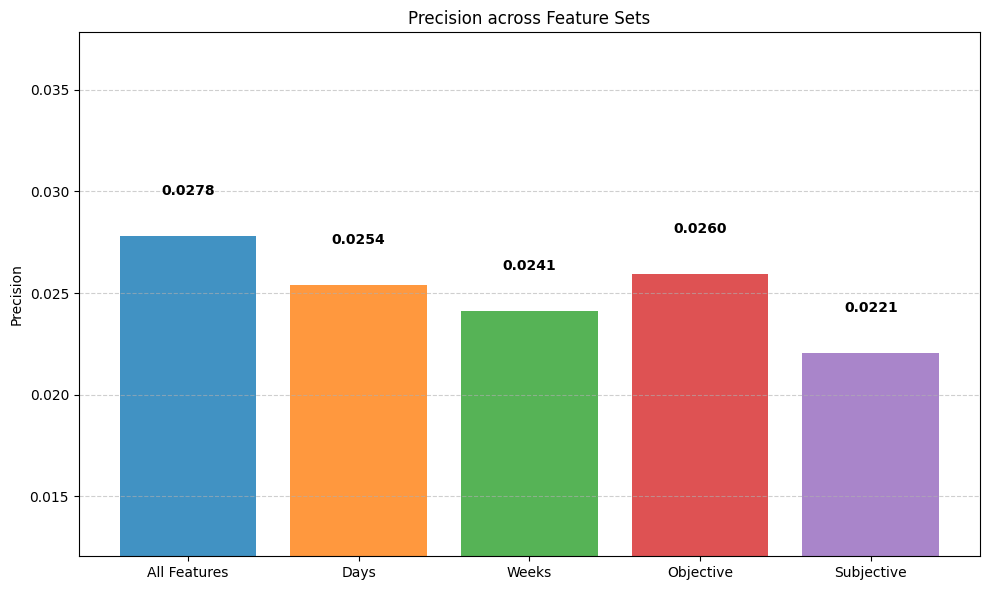

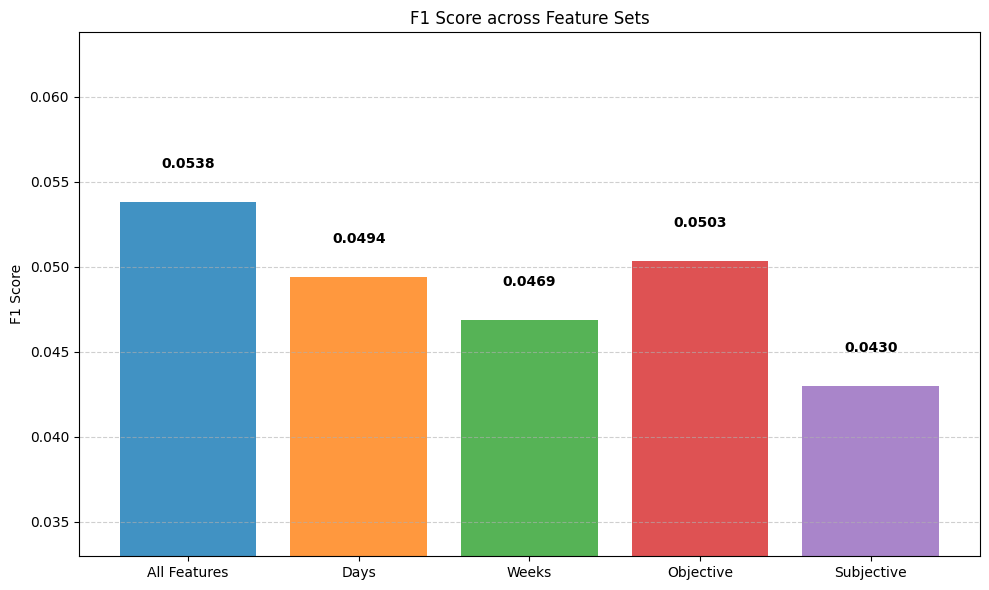

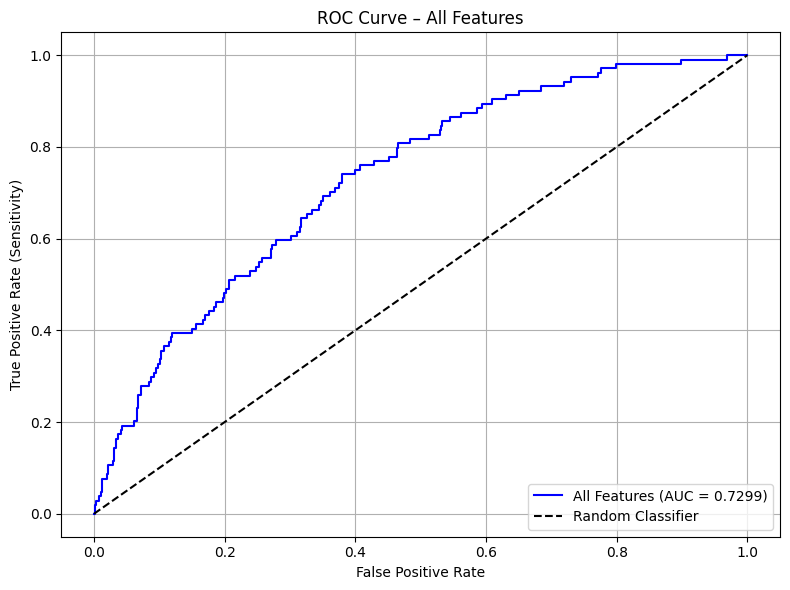

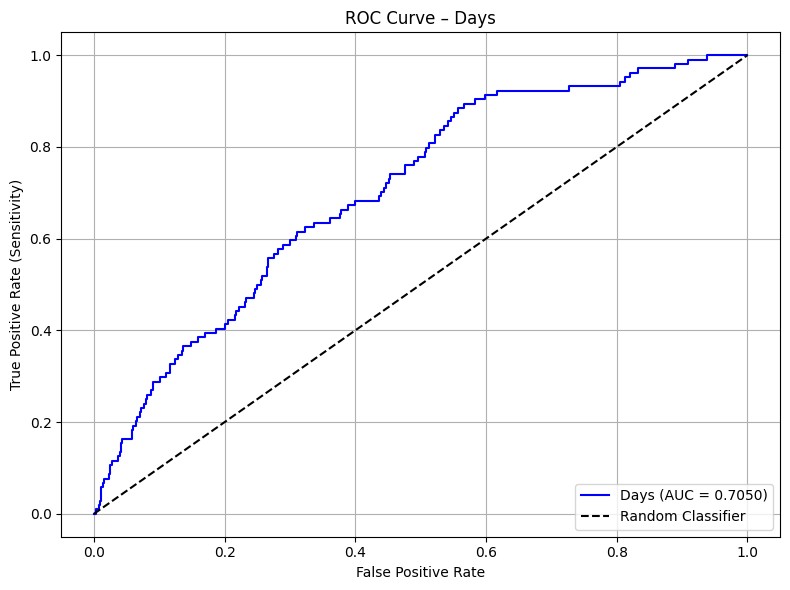

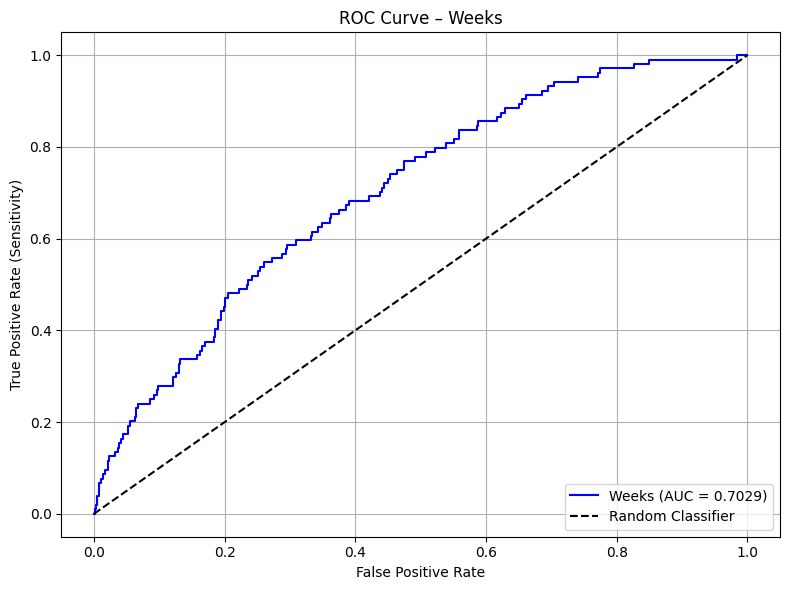

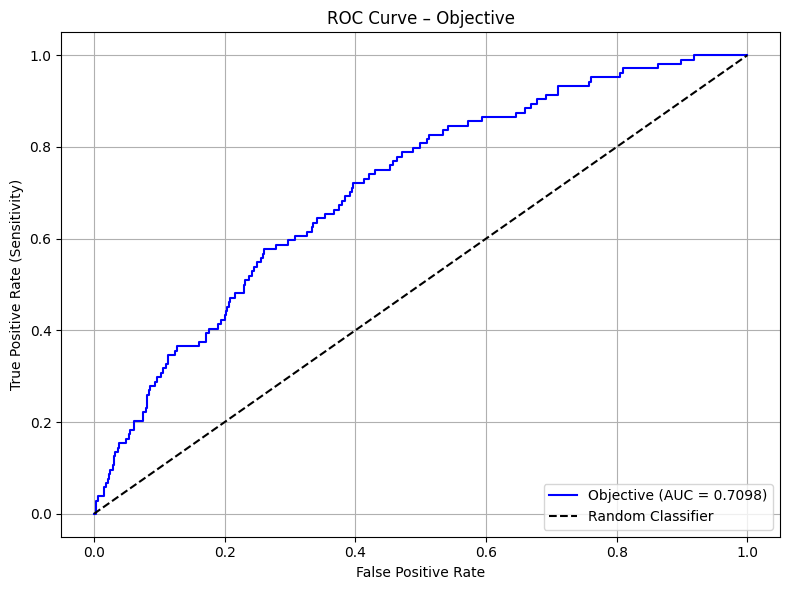

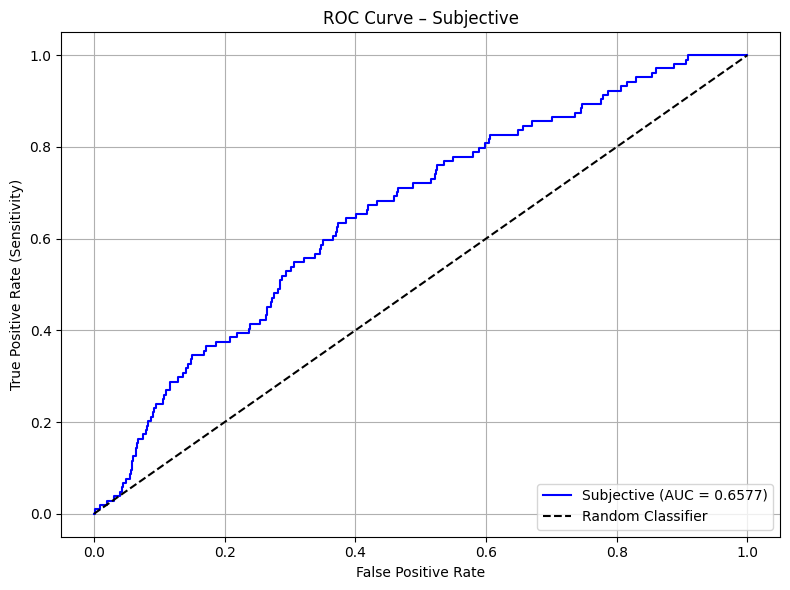

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc


feature_set_names = list(results.keys())

auc_scores = [results[k]['auc'] for k in feature_set_names]
sensitivity_scores = [results[k]['sensitivity'] for k in feature_set_names]
specificity_scores = [results[k]['specificity'] for k in feature_set_names]
precision_scores = [results[k]['precision'] for k in feature_set_names]
f1_scores = [results[k]['f1'] for k in feature_set_names]

metrics = {
    "AUC Score": auc_scores,
    "Sensitivity": sensitivity_scores,
    "Specificity": specificity_scores,
    "Precision": precision_scores,
    "F1 Score": f1_scores,
}

colors = ["#1177b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for metric_name, values in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.bar(feature_set_names, values, color=colors, alpha=0.8)
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} across Feature Sets")
    plt.ylim(min(values) - 0.01, max(values) + 0.01)
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    for i, v in enumerate(values):
        plt.text(i, v + 0.002, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

# ROC-Curves
test_data = {
    'All Features': (X_test, Y_test),
    'Days': (X_test_days, Y_test_days),
    'Weeks': (X_test_weeks, Y_test_weeks),
    'Objective': (X_test_objective, Y_test_objective),
    'Subjective': (X_test_subjective, Y_test_subjective)
}

for name, (X, y_true) in test_data.items():
    models = feature_sets[name][0]  # Modelle aus dem geladenen Set
    y_pred_proba = ensemble_pred(models, X)

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title(f"ROC Curve – {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
